## Exercice 1

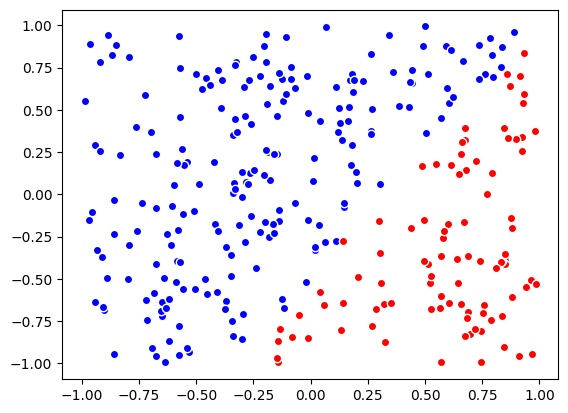

In [2]:
import torch
import pub_preliminaries as pb
import torch.nn as nn

def generate_data_L2C2(nb_samples): 
    data_inputs = torch.rand(nb_samples, 2)*2 -1 #convertir dans l'intervalle [-1,1]
    weight1 = -1.5
    intercept = 0.5
    bruit = torch.normal(mean=0.0, std=0.01, size=(nb_samples,))
    data_labels = (weight1 * data_inputs[:, 0] + data_inputs[:, 1] + intercept + bruit) > 0
    return (data_inputs, data_labels)
    
data_inputs, data_labels = generate_data_L2C2(300)
pb.show_data_L2C2(data_inputs, data_labels)

## Exercice 2

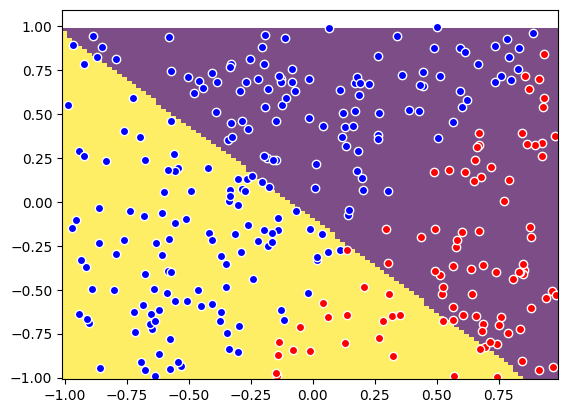

In [3]:
def model_ws(X, weights, bias):
    return torch.sigmoid( torch.matmul(X, weights) + bias )
    
weights = torch.randn(2, requires_grad=True)
bias = torch.randn(1, requires_grad=True)

model = lambda x: model_ws(x, weights, bias)
pb.show_data_L2C2(data_inputs, data_labels, model = model)

## Exercice 3

In [4]:
def loss_function(actual, predicted):
    epsilon = 1e-7
    prediction = torch.clamp(predicted, epsilon, 1.0 - epsilon)
    return -torch.sum(actual * torch.log(prediction) + (1 - actual) * torch.log(1 - prediction))


def f(weight, bias):
    predicted = model_ws(data_inputs, weight, bias)
    return loss_function(data_labels.long(), predicted)

loss = f(weights, bias)
print("Loss function calculates : ", loss.item())

Loss function calculates :  217.62567138671875


## Exercice 4

In [5]:
def grad_des(weight, bias, lr, epochs):
    for iter in range(epochs):
        
        # Forward pass
        loss = f(weight, bias)
        # Backward pass
        loss.backward()
        
        # Update 
        with torch.no_grad():
            weight -= lr * weight.grad
            bias -=  lr * bias.grad
            # Prevent accumulation by zeroing the grad
            weight.grad.zero_()
            bias.grad.zero_()   

        if iter % 10000 == 0:
            print(f" la perte pour l'epoch {iter} est de : {loss}")
            
    return weight, bias

lr = 0.001
epochs = 500000
weight_des,bias_des=grad_des(weights, bias, lr, epochs)

 la perte pour l'epoch 0 est de : 217.62567138671875
 la perte pour l'epoch 1000 est de : 29.327577590942383
 la perte pour l'epoch 2000 est de : 22.7198429107666
 la perte pour l'epoch 3000 est de : 19.619434356689453
 la perte pour l'epoch 4000 est de : 17.69232177734375
 la perte pour l'epoch 5000 est de : 16.332515716552734
 la perte pour l'epoch 6000 est de : 15.30035400390625
 la perte pour l'epoch 7000 est de : 14.478766441345215
 la perte pour l'epoch 8000 est de : 13.80258560180664
 la perte pour l'epoch 9000 est de : 13.2321195602417
 la perte pour l'epoch 10000 est de : 12.741576194763184
 la perte pour l'epoch 11000 est de : 12.313329696655273
 la perte pour l'epoch 12000 est de : 11.934821128845215
 la perte pour l'epoch 13000 est de : 11.596837043762207
 la perte pour l'epoch 14000 est de : 11.29244327545166
 la perte pour l'epoch 15000 est de : 11.01626205444336
 la perte pour l'epoch 16000 est de : 10.764086723327637
 la perte pour l'epoch 17000 est de : 10.532567977905

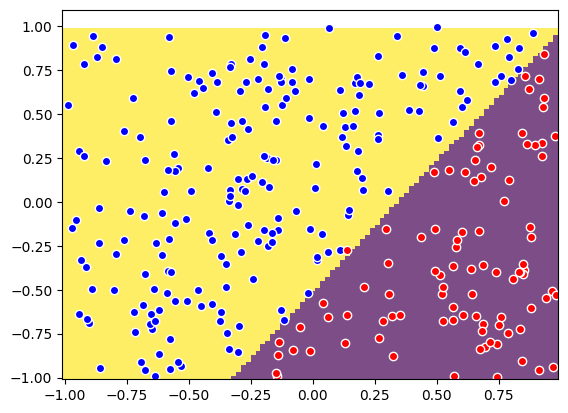

In [6]:
#affichage de la classification optimisée 
model = lambda x: model_ws(x, weight_des, bias_des)
pb.show_data_L2C2(data_inputs, data_labels, model = model)

## Ecercice 5

In [7]:
def generate_data_L2C3(nb_samples):
    
    data_inputs = torch.rand(nb_samples, 2)* 2 -1
    bruit = torch.normal(mean=0.0, std=0.01, size=(nb_samples,))
    condition_1 = (3 * data_inputs[:, 0] - data_inputs[:, 1] - 0.2 + bruit) > 0
    condition_2 = (-0.5 * data_inputs[:, 0] - data_inputs[:, 1] + 0.25 + bruit) > 0
    condition_3 = ~ (condition_1 | condition_2)
    #init y
    data_labels = torch.zeros(nb_samples, dtype=torch.long)
    data_labels[condition_1] = 0
    data_labels[condition_2] = 1
    data_labels[condition_3] = 2
    return (data_inputs, data_labels)

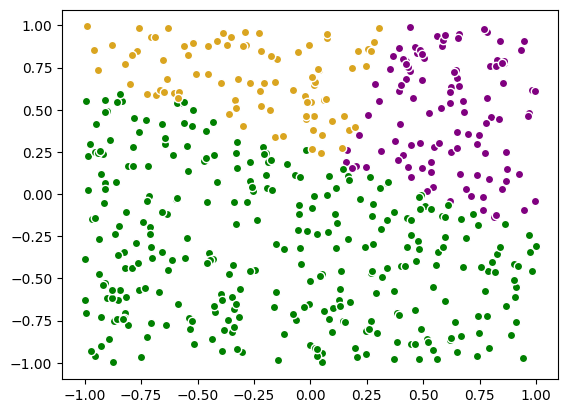

In [8]:
data_inputs, data_labels = generate_data_L2C3(500)
pb.show_data_L2C3(data_inputs, data_labels)

## Exercice 6

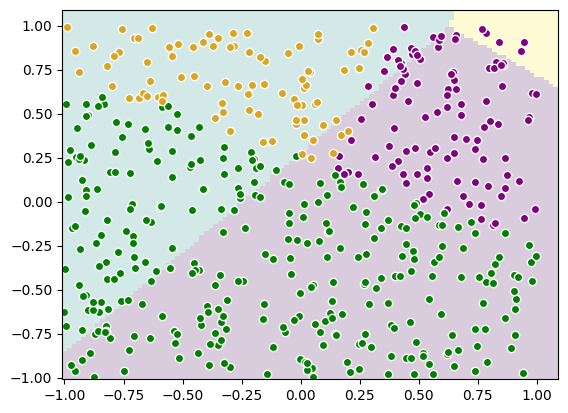

In [9]:
def model_ws(X, weights, bias):
    temp = torch.matmul(X, weights) + bias
    return torch.nn.LogSoftmax(dim=1)(temp)

weights_ = torch.rand(2, 3, requires_grad=True)
bias_ = torch.rand(3, requires_grad=True)
model = lambda x: model_ws(x, weights_, bias_)
pb.show_data_L2C3(data_inputs, data_labels, model = model)

## Exercice 7

In [10]:
def f_(weights, bias):
    loss_fn = nn.NLLLoss()
    predicted = model_ws(data_inputs, weights, bias)
    loss = loss_fn(predicted, data_labels)
    return loss

In [11]:
loss = f_(weights_, bias_)
print("Loss function calculates:", loss.item())

Loss function calculates: 1.1164921522140503


## Exercice 8

In [12]:
def grad_des3(weight, bias, lr, epochs):
    for iter in range(epochs):
        
        # Forward pass
        loss = f_(weight, bias)
        # Backward pass
        loss.backward()
        
        # Update 
        with torch.no_grad():
            weight -= lr * weight.grad
            bias -=  lr * bias.grad
            # Prevent accumulation by zeroing the grad
            weight.grad.zero_()
            bias.grad.zero_()   

        if iter % 100000 == 0:
            print(f" la perte pour l'epoch {iter} est de : {loss}")
            
    return weight, bias

lr = 0.001
epochs = 500000
weight_des,bias_des=grad_des3(weights_, bias_, lr, epochs)

 la perte pour l'epoch 0 est de : 1.1164921522140503
 la perte pour l'epoch 100000 est de : 0.24984878301620483
 la perte pour l'epoch 200000 est de : 0.20782090723514557
 la perte pour l'epoch 300000 est de : 0.1880253106355667
 la perte pour l'epoch 400000 est de : 0.17570143938064575


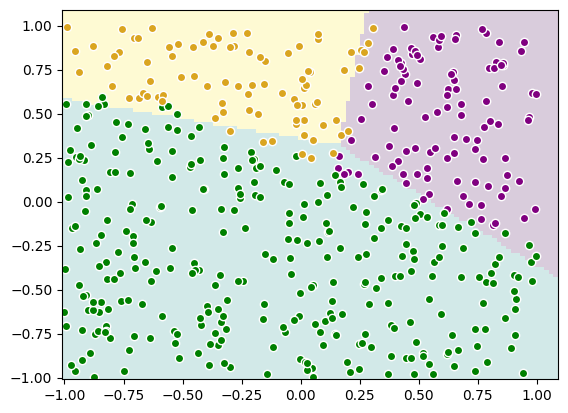

In [13]:
#affichage de la classification optimisée 
model = lambda x: model_ws(x, weight_des, bias_des)
pb.show_data_L2C3(data_inputs, data_labels, model = model)

## Exercice 9

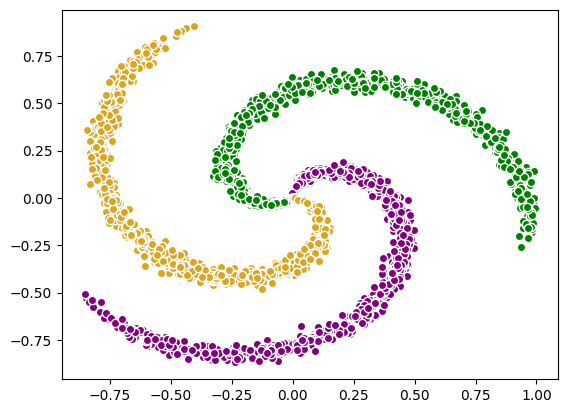

In [14]:
loaded_data = torch.load('pub_database.pt')
data_inputs = loaded_data[0]
data_labels = loaded_data[1]
pb.show_data_L2C3(data_inputs, data_labels)

## Excercice 10

In [15]:
def f_(weights, bias):
    loss_fn = nn.NLLLoss()
    predicted = model_ws(data_inputs, weights, bias)
    loss = loss_fn(predicted, data_labels)
    return loss
loss = f_(weights_, bias_)
print("Loss function calculates:", loss.item())    

Loss function calculates: 5.243108749389648


In [16]:
def grad_des3(weight, bias, lr, epochs):
    for iter in range(epochs):
        
        # Forward pass
        loss = f_(weight, bias)
        # Backward pass
        loss.backward()
        
        # Update 
        with torch.no_grad():
            weight -= lr * weight.grad
            bias -=  lr * bias.grad
            # Prevent accumulation by zeroing the grad
            weight.grad.zero_()
            bias.grad.zero_()   

        if iter % 100000 == 0:
            print(f" la perte pour l'epoch {iter} est de : {loss}")
            
    return weight, bias

lr = 0.001
epochs = 500000
weight_des,bias_des=grad_des3(weights_, bias_, lr, epochs)

 la perte pour l'epoch 0 est de : 5.243108749389648
 la perte pour l'epoch 100000 est de : 0.7377637624740601
 la perte pour l'epoch 200000 est de : 0.7262439727783203
 la perte pour l'epoch 300000 est de : 0.7254459857940674
 la perte pour l'epoch 400000 est de : 0.7253555655479431


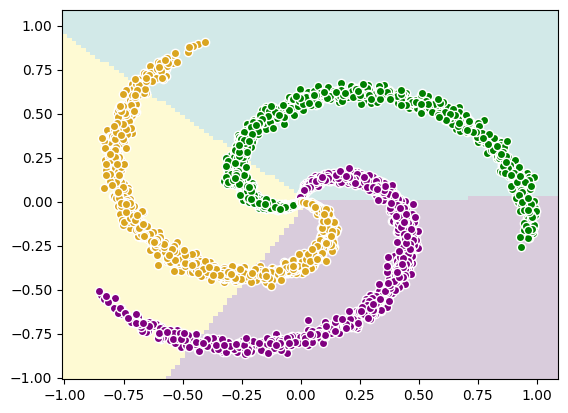

In [17]:
#affichage de la classification optimisée 
model = lambda x: model_ws(x, weight_des, bias_des)
pb.show_data_L2C3(data_inputs, data_labels, model = model)